In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn import cross_validation
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

/Users/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [4]:
dataset = pd.read_csv('network_backup_dataset.csv')
dataset.columns = ['week', 'day_of_week', 'backup_start_time', 'work_flow_id', 'file_name', 'size_of_backup', 'backup_time']
dataset_revised = one_hot(dataset, ['day_of_week', 'backup_start_time', 'work_flow_id', 'file_name'])
dataset_revised.drop('day_of_week', 1, inplace=True)
dataset_revised.drop('backup_start_time', 1, inplace=True)
dataset_revised.drop('work_flow_id',1,inplace=True)
dataset_revised.drop('file_name',1,inplace=True)

In [5]:
def calculate_RMSE(predicted_value, actual_value):
    return (math.sqrt(mean_squared_error(actual_value, predicted_value)))

## Relu

In [5]:
training_data = dataset_revised.copy()
testing_data = training_data.pop('size_of_backup')
training_data = training_data.values
testing_data = testing_data.values
k_fold = KFold(n_splits=10)
trainRMSE = []
testRMSE = []
hidden_layers = range(20,1000,20)
for a in hidden_layers:
    testMSE = []
    trainMSE = []
    for train, test in k_fold.split(training_data, testing_data):
        neural_network = MLPRegressor(hidden_layer_sizes=(a, ), activation='relu', random_state=42)
        neural_network.fit(training_data[train].astype(int), testing_data[train].astype(int))
        predicted_test_data = neural_network.predict(training_data[test])
        predicted_train_data = neural_network.predict(training_data[train])
    
        trainMSE.append(metrics.mean_squared_error(testing_data[train], predicted_train_data))
        testMSE.append(metrics.mean_squared_error(testing_data[test], predicted_test_data))
    
    trainRMSE.append(np.sqrt(np.mean(trainMSE)))
    testRMSE.append(np.sqrt(np.mean(testMSE)))

    print('At hidden value', a, 'trainRMSE: ', trainRMSE[len(trainRMSE)-1])
    print('At hidden value', a, 'testRMSE: ', testRMSE[len(testRMSE)-1])

At hidden value 20 trainRMSE:  0.113300989284
At hidden value 20 testRMSE:  0.117132114712
At hidden value 40 trainRMSE:  0.112726416554
At hidden value 40 testRMSE:  0.114797490919
At hidden value 60 trainRMSE:  0.108942397166
At hidden value 60 testRMSE:  0.112217524337
At hidden value 80 trainRMSE:  0.11125142974
At hidden value 80 testRMSE:  0.113894284934
At hidden value 100 trainRMSE:  0.10811642054
At hidden value 100 testRMSE:  0.111590834318
At hidden value 120 trainRMSE:  0.111334256423
At hidden value 120 testRMSE:  0.113403404731
At hidden value 140 trainRMSE:  0.108529253034
At hidden value 140 testRMSE:  0.109222318199
At hidden value 160 trainRMSE:  0.109710471867
At hidden value 160 testRMSE:  0.11448911913
At hidden value 180 trainRMSE:  0.104279269364
At hidden value 180 testRMSE:  0.106084040901
At hidden value 200 trainRMSE:  0.109358133241
At hidden value 200 testRMSE:  0.110637374275
At hidden value 220 trainRMSE:  0.109307455175
At hidden value 220 testRMSE:  0.1

In [6]:
lowest_test_RMSE = np.sort(testRMSE)
print('The lowest test RMSE value is', lowest_test_RMSE[0])
indexes_sorted = np.argsort(testRMSE)
max_index = indexes_sorted[0]
max_hidden_value = (max_index+1)*20
print('The lowest test RMSE value is for hidden value', max_hidden_value)

The lowest test RMSE value is 0.102685572307
The lowest test RMSE value is for hidden value 580


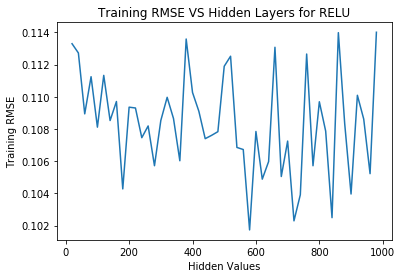

In [7]:
plt.title('Training RMSE VS Hidden Layers for RELU')
plt.plot(hidden_layers, trainRMSE)
plt.ylabel('Training RMSE')
plt.xlabel('Hidden Values')
plt.show()

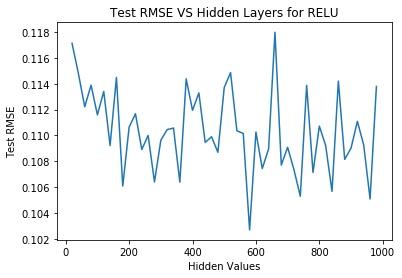

In [8]:
plt.title('Test RMSE VS Hidden Layers for RELU')
plt.plot(hidden_layers, testRMSE)
plt.ylabel('Test RMSE')
plt.xlabel('Hidden Values')
plt.show()

## Logistic

In [9]:
training_data = dataset_revised.copy()
testing_data = training_data.pop('size_of_backup')
training_data = training_data.values
testing_data = testing_data.values
k_fold = KFold(n_splits=10)
trainRMSE = []
testRMSE = []
hidden_layers = range(20,1000,20)
for a in hidden_layers:
    testMSE = []
    trainMSE = []
    for train, test in k_fold.split(training_data, testing_data):
        neural_network = MLPRegressor(hidden_layer_sizes=(a, ), activation='logistic', random_state=42)
        neural_network.fit(training_data[train].astype(int), testing_data[train].astype(int))
        predicted_test_data = neural_network.predict(training_data[test])
        predicted_train_data = neural_network.predict(training_data[train])
    
        trainMSE.append(metrics.mean_squared_error(testing_data[train], predicted_train_data))
        testMSE.append(metrics.mean_squared_error(testing_data[test], predicted_test_data))
    
    trainRMSE.append(np.sqrt(np.mean(trainMSE)))
    testRMSE.append(np.sqrt(np.mean(testMSE)))

    print('At hidden value', a, 'trainRMSE: ', trainRMSE[len(trainRMSE)-1])
    print('At hidden value', a, 'testRMSE: ', testRMSE[len(testRMSE)-1])

At hidden value 20 trainRMSE:  0.114137102433
At hidden value 20 testRMSE:  0.114041413738
At hidden value 40 trainRMSE:  0.114146504758
At hidden value 40 testRMSE:  0.114405052927
At hidden value 60 trainRMSE:  0.113389176148
At hidden value 60 testRMSE:  0.113700390645
At hidden value 80 trainRMSE:  0.11494421447
At hidden value 80 testRMSE:  0.115334439278
At hidden value 100 trainRMSE:  0.11296410514
At hidden value 100 testRMSE:  0.112770740067
At hidden value 120 trainRMSE:  0.116293918152
At hidden value 120 testRMSE:  0.116862874989
At hidden value 140 trainRMSE:  0.117154397585
At hidden value 140 testRMSE:  0.117391998225
At hidden value 160 trainRMSE:  0.115610123162
At hidden value 160 testRMSE:  0.115737774445
At hidden value 180 trainRMSE:  0.113911176879
At hidden value 180 testRMSE:  0.11379786
At hidden value 200 trainRMSE:  0.112430213123
At hidden value 200 testRMSE:  0.112221240417
At hidden value 220 trainRMSE:  0.111185717065
At hidden value 220 testRMSE:  0.1112

In [10]:
lowest_test_RMSE = np.sort(testRMSE)
print('The lowest test RMSE value is', lowest_test_RMSE[0])
indexes_sorted = np.argsort(testRMSE)
max_index = indexes_sorted[0]
max_hidden_value = (max_index+1)*20
print('The lowest test RMSE value is for hidden value', max_hidden_value)

The lowest test RMSE value is 0.107303675198
The lowest test RMSE value is for hidden value 580


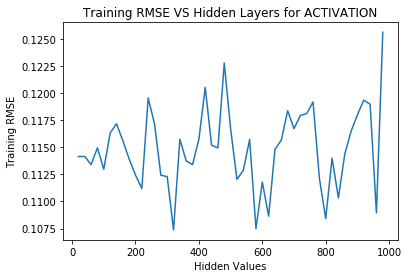

In [11]:
plt.title('Training RMSE VS Hidden Layers for ACTIVATION')
plt.plot(hidden_layers, trainRMSE)
plt.ylabel('Training RMSE')
plt.xlabel('Hidden Values')
plt.show()

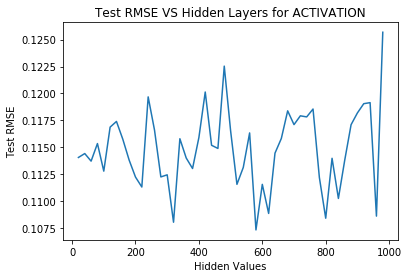

In [12]:
plt.title('Test RMSE VS Hidden Layers for ACTIVATION')
plt.plot(hidden_layers, testRMSE)
plt.ylabel('Test RMSE')
plt.xlabel('Hidden Values')
plt.show()

## Tanh

In [13]:
training_data = dataset_revised.copy()
testing_data = training_data.pop('size_of_backup')
training_data = training_data.values
testing_data = testing_data.values
k_fold = KFold(n_splits=10)
trainRMSE = []
testRMSE = []
hidden_layers = range(20,1000,20)
for a in hidden_layers:
    testMSE = []
    trainMSE = []
    for train, test in k_fold.split(training_data, testing_data):
        neural_network = MLPRegressor(hidden_layer_sizes=(a, ), activation='tanh', random_state=42)
        neural_network.fit(training_data[train].astype(int), testing_data[train].astype(int))
        predicted_test_data = neural_network.predict(training_data[test])
        predicted_train_data = neural_network.predict(training_data[train])
    
        trainMSE.append(metrics.mean_squared_error(testing_data[train], predicted_train_data))
        testMSE.append(metrics.mean_squared_error(testing_data[test], predicted_test_data))
    
    trainRMSE.append(np.sqrt(np.mean(trainMSE)))
    testRMSE.append(np.sqrt(np.mean(testMSE)))

    print('At hidden value', a, 'trainRMSE: ', trainRMSE[len(trainRMSE)-1])
    print('At hidden value', a, 'testRMSE: ', testRMSE[len(testRMSE)-1])

At hidden value 20 trainRMSE:  0.116427322622
At hidden value 20 testRMSE:  0.120454313238
At hidden value 40 trainRMSE:  0.11175107233
At hidden value 40 testRMSE:  0.114359116882
At hidden value 60 trainRMSE:  0.113493488762
At hidden value 60 testRMSE:  0.114905223118
At hidden value 80 trainRMSE:  0.11311243401
At hidden value 80 testRMSE:  0.1142762927
At hidden value 100 trainRMSE:  0.113867929126
At hidden value 100 testRMSE:  0.115675891703
At hidden value 120 trainRMSE:  0.107090990581
At hidden value 120 testRMSE:  0.108520717889
At hidden value 140 trainRMSE:  0.111342059177
At hidden value 140 testRMSE:  0.112327674234
At hidden value 160 trainRMSE:  0.111796944496
At hidden value 160 testRMSE:  0.113097133218
At hidden value 180 trainRMSE:  0.115302183169
At hidden value 180 testRMSE:  0.114865009135
At hidden value 200 trainRMSE:  0.114732474853
At hidden value 200 testRMSE:  0.115127796852
At hidden value 220 trainRMSE:  0.115057325376
At hidden value 220 testRMSE:  0.11

In [14]:
lowest_test_RMSE = np.sort(testRMSE)
print('The lowest test RMSE value is', lowest_test_RMSE[0])
indexes_sorted = np.argsort(testRMSE)
max_index = indexes_sorted[0]
max_hidden_value = (max_index+1)*20
print('The lowest test RMSE value is for hidden value', max_hidden_value)

The lowest test RMSE value is 0.106801942285
The lowest test RMSE value is for hidden value 320


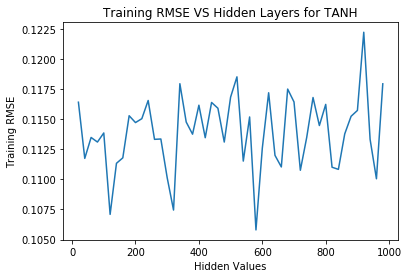

In [15]:
plt.title('Training RMSE VS Hidden Layers for TANH')
plt.plot(hidden_layers, trainRMSE)
plt.ylabel('Training RMSE')
plt.xlabel('Hidden Values')
plt.show()

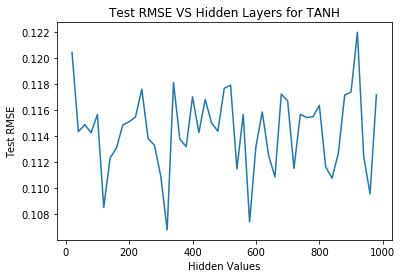

In [16]:
plt.title('Test RMSE VS Hidden Layers for TANH')
plt.plot(hidden_layers, testRMSE)
plt.ylabel('Test RMSE')
plt.xlabel('Hidden Values')
plt.show()

### Best Test RMSE is with Relu, number of hidden layers is 580

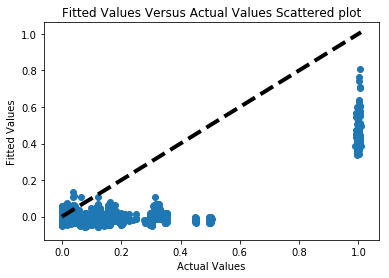

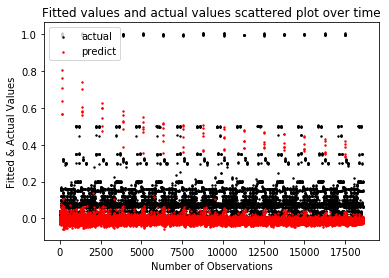

In [6]:
training_data = dataset_revised.copy()
testing_data = training_data.pop('size_of_backup')
training_data = training_data.values
testing_data = testing_data.values

neural_network = MLPRegressor(hidden_layer_sizes=(580, ), activation='relu', random_state=42)
neural_network.fit(training_data.astype(int), testing_data.astype(int))
predicted_test_data = neural_network.predict(training_data)
    
plt.title('Fitted Values Versus Actual Values Scattered plot')
plt.scatter(testing_data, predicted_test_data)
plt.plot([testing_data.min(), testing_data.max()], [testing_data.min(), testing_data.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.figure()
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(testing_data.shape[0]), testing_data, color='black', label='actual', s=2)
plt.scatter(np.arange(testing_data.shape[0]), predicted_test_data, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
plt.show()

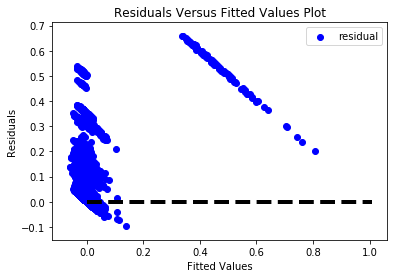

In [7]:
# plot residuals versus fitted values plot
plt.title('Residuals Versus Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predicted_test_data,testing_data-predicted_test_data,  color='blue', lw=1, label='residual')
plt.plot([testing_data.min(), testing_data.max()], [0, 0], 'k--', lw=4)
plt.legend(loc='upper right')
plt.show()